### Importing necessary Libraries & Dataset

In [1]:
import pandas as pd

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Netflix Shows Data Analysis\Netflix Shows.csv')
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Data Exploration

In [2]:
data.shape

(7789, 11)

In [3]:
data.size

85679

In [4]:
data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [5]:
data.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


### Data Cleaning

Is there is any duplicate records in this dataset? If yes then remove the duplicates.

In [7]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.shape

(7787, 11)

Is there any null value present in any column? Show with heatmap.

In [10]:
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

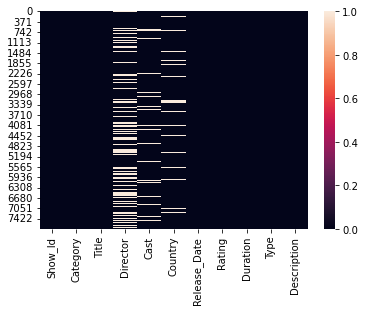

In [11]:
import seaborn as sns

sns.heatmap(data.isnull())

### Exploratory Data Analysis

For house of cards, what is show id & who is director of this show?

In [12]:
data[data['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [13]:
data[data['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In which year highest no of tv shows & movies were released? Show with bar graph.

In [14]:
data['Date_N'] = pd.to_datetime(data['Release_Date'])

In [15]:
data['Date_N'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date_N, dtype: int64

<AxesSubplot:>

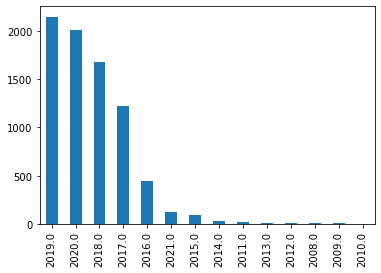

In [16]:
data['Date_N'].dt.year.value_counts().plot(kind = 'bar')

How many movies & tv shows are in dataset? Show with bar graph.

In [17]:
data.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

C:\Users\SHREE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

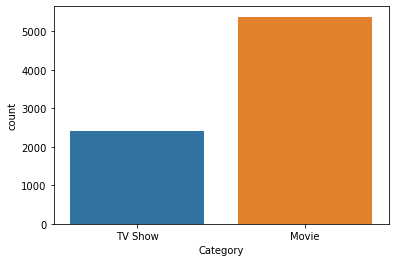

In [18]:
sns.countplot(data['Category'])

Show all movies that were released in 2000.

In [19]:
data['Year'] = data['Date_N'].dt.year

In [20]:
data[(data['Category'] == 'Movie') & (data['Year'] == 2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year


Show only titles of all tv shows that were released in india only.

In [21]:
data[(data['Category'] == 'TV Show') & (data['Country'] == 'India')] ['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

Show top 10 directors who gave highest no of tv shows & movies to netflix.

In [22]:
data['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

Show all records where category is movie & type is comedies or country is uk.

In [23]:
data[(data['Category'] == 'Movie') & (data['Type'] == 'Comedies') | (data['Country'] == ' United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019.0
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020-02-14,2020.0
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018-01-26,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,"November 5, 2019",R,85 min,Comedies,When a beloved secret agent falls deep into a ...,2019-11-05,2019.0
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,"January 22, 2018",R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018-01-22,2018.0
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017-05-13,2017.0
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019-05-10,2019.0


In how many movies/shows, tom cruise was cast?

In [24]:
data[data['Cast'] == 'Tom Cruise']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year


In [26]:
data_new = data.dropna()

In [27]:
data_new[data_new['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


What are different ratings defined by Netflix?

In [29]:
data['Rating'].nunique()

14

In [30]:
data['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

How many movies got TV-14 rating in canada?

In [32]:
data[(data['Category'] == 'Movie') & (data['Rating'] == 'TV-14') & (data['Country'] == 'Canada')].shape

(11, 13)

How many tv shows got R rating after year 2018?

In [33]:
data[(data['Category'] == 'TV Show') & (data['Rating'] == 'R') & (data['Year'] > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


What is maximum duration of movie/show on netflix?

In [34]:
data.Duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [35]:
data.Duration.dtypes

dtype('O')

In [36]:
data[['Minutes', 'Unit']] = data['Duration'].str.split(' ', expand = True)

In [37]:
data.Minutes.max()

'99'

In [38]:
data.Minutes.min()

'1'

Which individual country has highest no of tv shows?

In [39]:
data_tvshow = data[data['Category'] == 'TV Show']

In [41]:
data_tvshow.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

How can we sort dataset by year?

In [42]:
data.sort_values(by = 'Year', ascending = False).head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,Minutes,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"January 1, 2021",PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min


Find all instances where:
Category is movie & type is dramas

or

category is tv show & type is kids tv

In [43]:
data[(data['Category'] == 'Movie') & (data['Type'] == 'Dramas') | (data['Category'] == 'TV Show') & (data['Type'] == "Kids' TV")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N,Year,Minutes,Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0,119,min
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020-10-01,2020.0,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,2019.0,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011.0,95,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,2017.0,2,Seasons
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018-06-23,2018.0,1,Season
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018-06-07,2018.0,1,Season
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019-02-22,2019.0,2,Seasons
